In [2]:
from os import path

DATA_DIRECTORY = path.join('2_series_naturales')
CSV_DIRECTORY  = path.join(DATA_DIRECTORY, 'CSV_results')


# 1. Análisis General (sin ventanas ni desplazamientos)

In [3]:
from charts import GeneralPerformanceChart
from charts import get_autoencoder_matrix_config


AE_config = get_autoencoder_matrix_config(CSV_DIRECTORY, 'AE', 20, 10)
VAE_config = get_autoencoder_matrix_config(CSV_DIRECTORY, 'VAE', 25, 15)


## 1.1 Graficas Generales

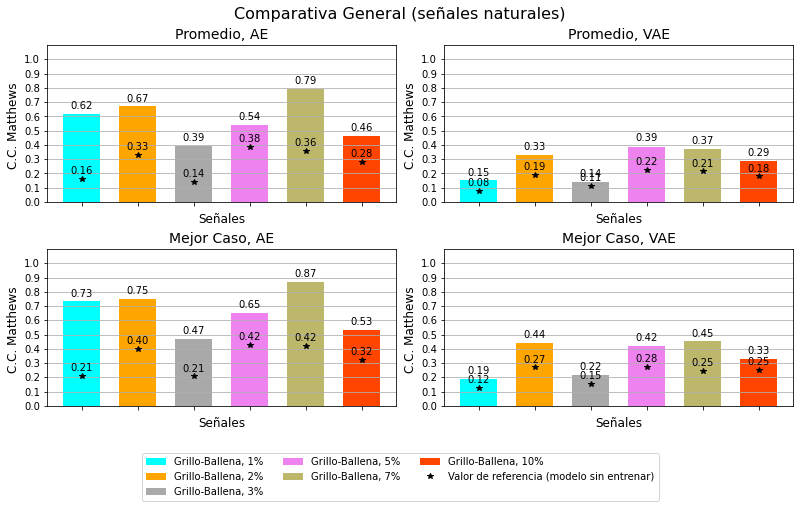

In [4]:
from experiments_configuration import get_natural_prefixes
from charts import build_legend_entry_for_animals

GeneralPerformanceChart().plot_dataframe(
    title='Comparativa General (señales naturales)',
    row_1_title='Promedio',
    row_2_title='Mejor Caso',
    row_1_column='promedio',
    row_2_column='mejor',
    config1=AE_config, 
    config2=VAE_config, 
    series=[(build_legend_entry_for_animals(prefix), prefix) for prefix in get_natural_prefixes()]
)


# 2. Análisis de ventanas y desplazamientos

In [5]:
from charts import get_autoencoder_matrix_config_from_file


AE_config = get_autoencoder_matrix_config_from_file(CSV_DIRECTORY, 'AE', 'AE_model_20_10')
VAE_config = get_autoencoder_matrix_config_from_file(CSV_DIRECTORY, 'VAE', 'VAE_model_25_15')



## 2.1. Análisis de desplazamientos 

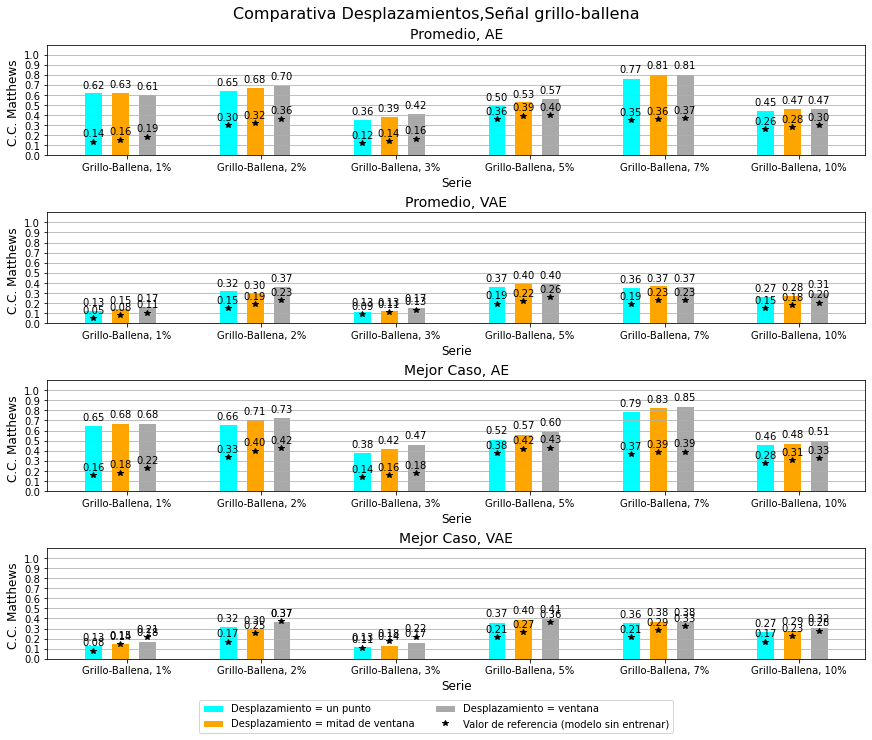

In [6]:
from charts import RowsDisplacementsChart
from experiments_configuration import get_natural_prefixes, get_natural_windows_autoencoder



RowsDisplacementsChart(
    AE_config, 
    VAE_config, 
    windows=get_natural_windows_autoencoder(),
    chart_width=12, 
    chart_height=10
    
).plot_dataframe(
    'Comparativa Desplazamientos,Señal grillo-ballena',
    'Promedio', 
    'Mejor Caso',
    prefixes=get_natural_prefixes()
)



## 2.2. Análisis de ventanas

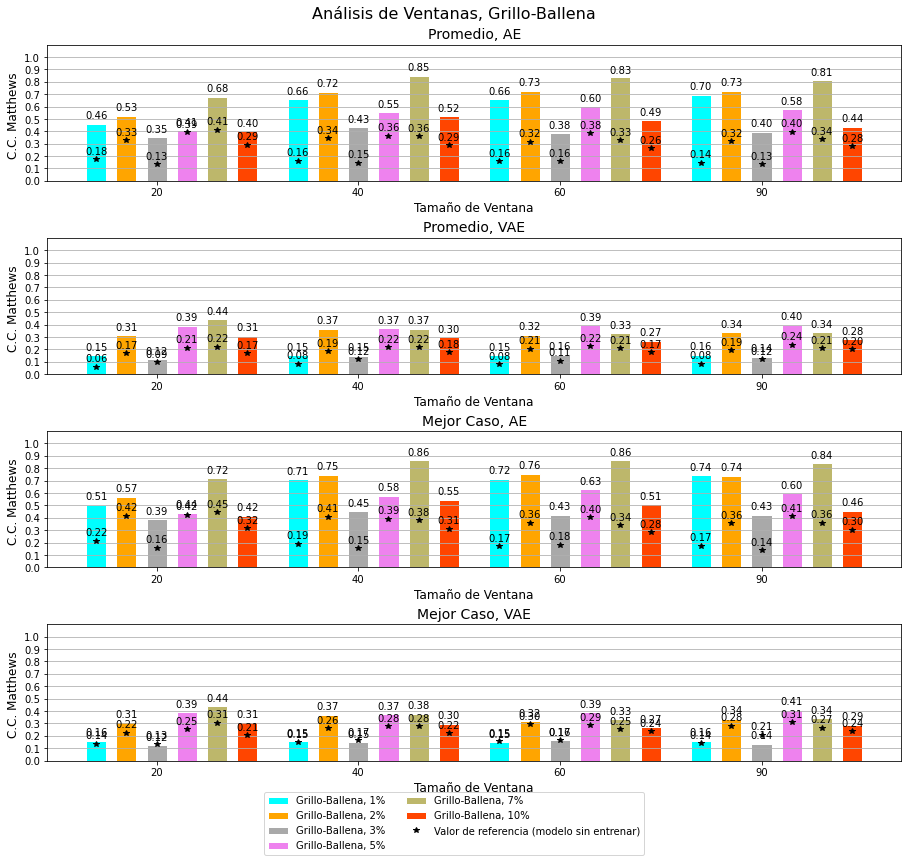

In [7]:
from charts import WindowsPerformanceChart, build_legend_entry_for_animals
from experiments_configuration import get_natural_prefixes, get_natural_windows_autoencoder

WindowsPerformanceChart(
    AE_config, 
    VAE_config, 
    windows=get_natural_windows_autoencoder(),
    bar_width=0.15,
    chart_width=12.5, 
    chart_height=11.5   
).plot_dataframe(
    'Análisis de Ventanas, Grillo-Ballena',
    'Promedio', 
    'Mejor Caso',
    [(build_legend_entry_for_animals(prefix), prefix) for prefix in get_natural_prefixes()]
)